## 04. 모델 세부 설정

In [1]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test)=mnist.load_data()

# 로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train/x_train.max()  # max:255
x_test = x_test/x_test.max()  # max:255


11490434/11490434 [==============================] - 1s 0us/step
train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


### 4-1. 초기값 설정

In [2]:
# 기본 초기화 방법 : Glorot Uniform 초기화 방법
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']


{'module': 'keras.initializers',
 'class_name': 'GlorotUniform',
 'config': {'seed': None},
 'registered_name': None}

In [3]:
# GlorotUniform 초기화 방법을 HeNormal로 변경하기 위해서 kernel_initializer 매개변수에 설정

# 문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
print(dense.get_config()['kernel_initializer'])

# 클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation='relu')
print(dense.get_config()['kernel_initializer'])

{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}
{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}


### 4-2. 규제(Regulation)
모델의 과대적합을 해소하기 위해 L1, L2 규제를 적용

In [4]:
# 기본값 = None
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'name': 'dense_3',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'module': 'keras.initializers',
  'class_name': 'GlorotUniform',
  'config': {'seed': None},
  'registered_name': None},
 'bias_initializer': {'module': 'keras.initializers',
  'class_name': 'Zeros',
  'config': {},
  'registered_name': None},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [5]:
# L1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

# 클래스 인스턴스 적용, alpha=0.1 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.009999999776482582}, 'registered_name': None}
{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.10000000149011612}, 'registered_name': None}


### 4-3. 드롭아웃(Dropout)
- 과대적합 문제를 해결해줌
- 노드의 일부 신호를 임의로 삭제하게 되면 모델이 과대적합 되는 것을 방지, 가중치 파라미터의 개수가 현저하게 줄어듦
- 훈련 시점에는 드롭아웃이 적용되어 노드 중 일부만 훈련, 예측 시점에는 모든 노드들이 활용

In [6]:
# dropout 25% 비율 적용 (25% 노드가 삭제)
tf.keras.layers.Dropout(0.25)


### 4-4. 배치 정규화 (Batch Normalization)
각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일을 정규화함

In [7]:
# model A : Dense + ReLu
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# model B : Dense + BatchNorm+ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                     

### 4-5. 활성화 함수

In [9]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [10]:
# model C : Dense + BatchNorm + LeakyReLU(0.2)
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10, activation='softmax')
])

# 모델 요약
model_c.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                     

- model a : Dense 레이어 + ReLU
- model b : Dense 레이어 + 배치 정규화
- model c : Dense 레이어 + 배치 정규화 + LeakyReLU

In [11]:
# 3개의 모델의 수렴 속도
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model A : Dense + ReLU
history_a = model_a.fit(x_train, y_train,
                      validation_data=(x_test, y_test),
                      epochs=10)

# Model B : Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train, y_train,
                      validation_data=(x_test, y_test),
                        epochs=10)

# Model C : Dense + BatchNorm + LeakyReLU(0,2)
history_c = model_c.fit(x_train, y_train,
                      validation_data=(x_test, y_test),
                        epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2906 - accuracy: 0.9171 - val_loss: 0.1432 - val_accuracy: 0.9588
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1263 - accuracy: 0.9627 - val_loss: 0.1074 - val_accuracy: 0.9666
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0925 - accuracy: 0.9724 - val_loss: 0.1062 - val_accuracy: 0.9668
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0729 - accuracy: 0.9766 - val_loss: 0.1085 - val_accuracy: 0.9654
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0585 - accuracy: 0.9822 - val_loss: 0.0953 - val_accuracy: 0.9713
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0492 - accuracy: 0.9848 - val_loss: 0.1020 - val_accuracy: 0.9705
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0435 - accuracy: 0.9857 - val_loss: 0.0866 - val_accu

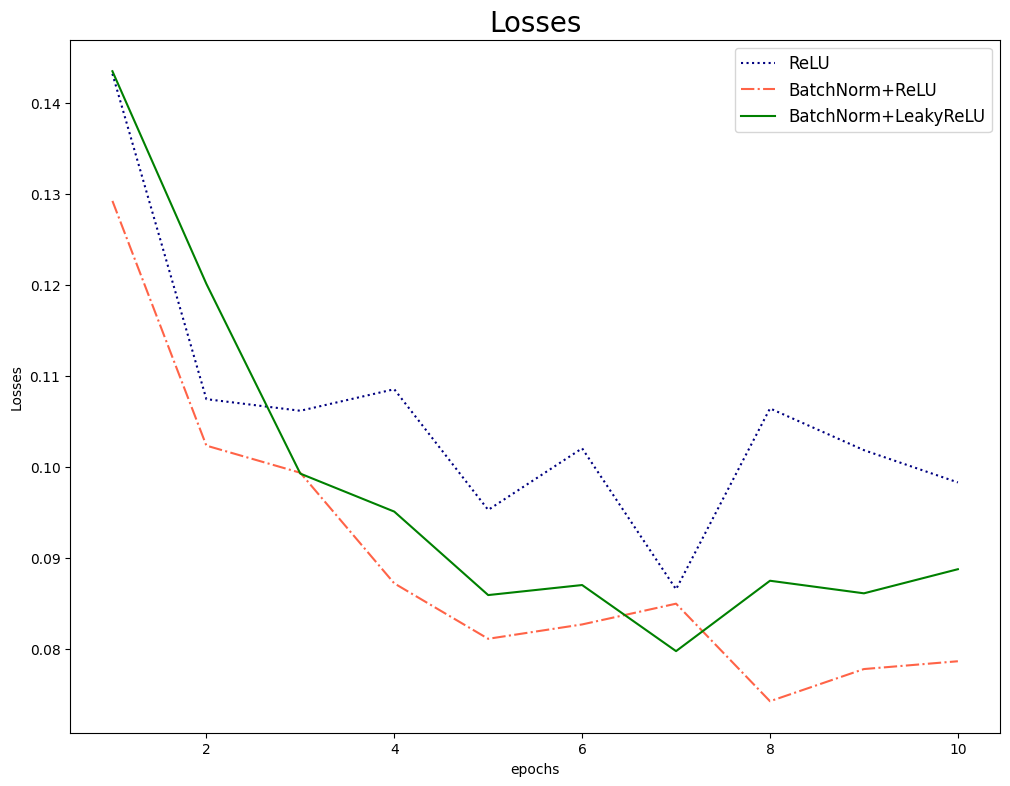

In [12]:
# 시각화
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1, 11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm+ReLU', 'BatchNorm+LeakyReLU'], fontsize=12)
plt.show()

## 06. 모델 저장 및 불러오기
### 6-1. 모델을 파일로 저장
save() 메소드를 사용하여 훈련을 종료하여 가중치가 업데이트된 모델 인스턴스를 저장

In [13]:
# 모델을 h5 포맷으로 저장
model_b.save('h5-model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 6-2. 저장된 모델 복원
- tensorflow.kerase.models.load_model() 메소드

In [14]:
# 모델 복원
h5_model = tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                     

In [15]:
# 모델 검증
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5_model] loss: {loss:.5f}, acc: {acc:.5f}')

h5_model] loss: 0.07864, acc: 0.97760


In [16]:
# 모델을 SavedModel 포맷으로 저장
model_b.save('saved-model')

In [17]:
# 모델 복원
saved_model = tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                     

In [18]:
# 모델 검증(HDF5 포맷)
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5_model] loss: {loss:.5f}, acc: {acc:.5f}')

# 모델 검증(SavedModel 포맷)
loss, acc = saved_model.evaluate(x_test, y_test, verbose= 0)
print(f'saved_model] loss: {loss:.5f}, acc: {acc:.5f}')

h5_model] loss: 0.07864, acc: 0.97760
saved_model] loss: 0.07864, acc: 0.97760


## 07. 복잡한 모델 생성
### 7-1. 함수형 API(Functional API)
다중 입력, 다중 출력, 같은 레벨에 여러 개의 층을 배치하여 입력과 출력을 공유하는 구조도 가능ㅎ마


In [19]:
# Sequential API 구현 -> 함수형 API 구현
import tensorflow as tf

# 모델의 레이어를 체인 구조로 연결 input 레이어 정의
input_layer = tf.keras.Input(shape=(28, 28), name='InputLayer')

# 모델의 레이어를 체인 구조로 연결
x1 = tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3 = tf.keras.layers.Dense(64, activation='relu', name='Dense2')(x2)
x4 = tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x3)

In [20]:
# 모델 생성
func_model = tf.keras.Model(inputs=input_layer, outputs=x4, name='FunctionalModel')

# 모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


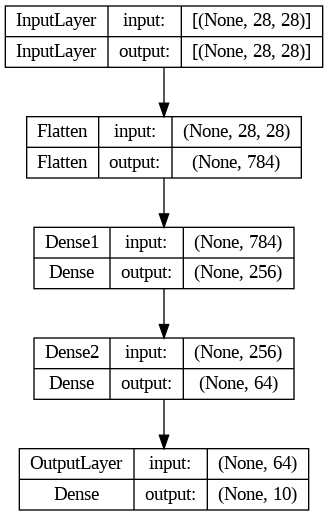

In [21]:
from tensorflow.keras.utils import plot_model

# 구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [22]:
# 컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
func_model.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2088 - accuracy: 0.9388
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0878 - accuracy: 0.9729
Epoch 3/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0593 - accuracy: 0.9815
Functional Model] loss: 0.07440, acc: 0.97590


### 7-2. 모델 서브클래싱(Model Subclassing)
Model 클래스를 상속받아 사용자가 직접 서브클래스로 딥러닝 모델 만들 수 있음

In [23]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    # 초기값 설정
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(256, activation='relu')
    self.dense2 = tf.keras.layers.Dense(64, activation='relu')
    self.dense3 = tf.keras.layers.Dense(10, activation='softmax')

  # method overiding
  # 훈련용 함수 정의
  # x는 input
  def call(self, x):
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    return x

In [24]:
# 모델 생성
mymodel = MyModel()

# 모델의 이름 설정
mymodel._name = 'subclass_model'

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         multiple                  0         
                                                                 
 dense_15 (Dense)            multiple                  200960    
                                                                 
 dense_16 (Dense)            multiple                  16448     
                                                                 
 dense_17 (Dense)            multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model] loss: {loss:.5f}, acc: {acc:.5f}')


Epoch 1/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2089 - accuracy: 0.9381
Epoch 2/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0876 - accuracy: 0.9732
Epoch 3/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0612 - accuracy: 0.9809
Subclassing Model] loss: 0.07720, acc: 0.97720


### 7-3. 서브클래싱 모델 파라미터를 활용한 생성
생성자 파라미터로 모델 내부 레이어의 하이퍼파라미터 지정가능

In [26]:
class MyModel(tf.keras.Model):

  # 생성자 파라미터 추가
  def __init__(self, units, num_classes):
    super(MyModel, self).__init__()
    # 초기값 설정
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(units, activation='relu')
    self.dense2 = tf.keras.layers.Dense(units/4, activation='relu')
    self.dense3 = tf.keras.layers.Dense(num_classes, activation='softmax')

  # class overiding
  # 훈련용 함수 정의
  # x는 input
  def call(self, x):
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    return x

In [27]:
# 모델 생성
mymodel = MyModel(256, 10)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

# 모델 요약
mymodel.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         multiple                  0         
                                                                 
 dense_18 (Dense)            multiple                  200960    
                                                                 
 dense_19 (Dense)            multiple                  16448     
                                                                 
 dense_20 (Dense)            multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model w.parameters] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2156 - accuracy: 0.9347
Epoch 2/3
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0906 - accuracy: 0.9720
Epoch 3/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0603 - accuracy: 0.9804
Subclassing Model w.parameters] loss: 0.06421, acc: 0.97980
